# Plotting policy projection

In [1]:
from rl_vcf.validate.utils import (
    load_policy_projection_database,
)
import numpy as np

In [2]:
policy_projection_database = load_policy_projection_database(
    "../../src/rl_vcf/outputs/2025-01-09/19-10-43/policy_projection_db.pkl"
)
policy_projection_database.concatenate_lists()

/home/jacques/projects/rl-vcf/src/rl_vcf/validate/utils.py:513: RuntimeWarning: divide by zero encountered in divide
  1


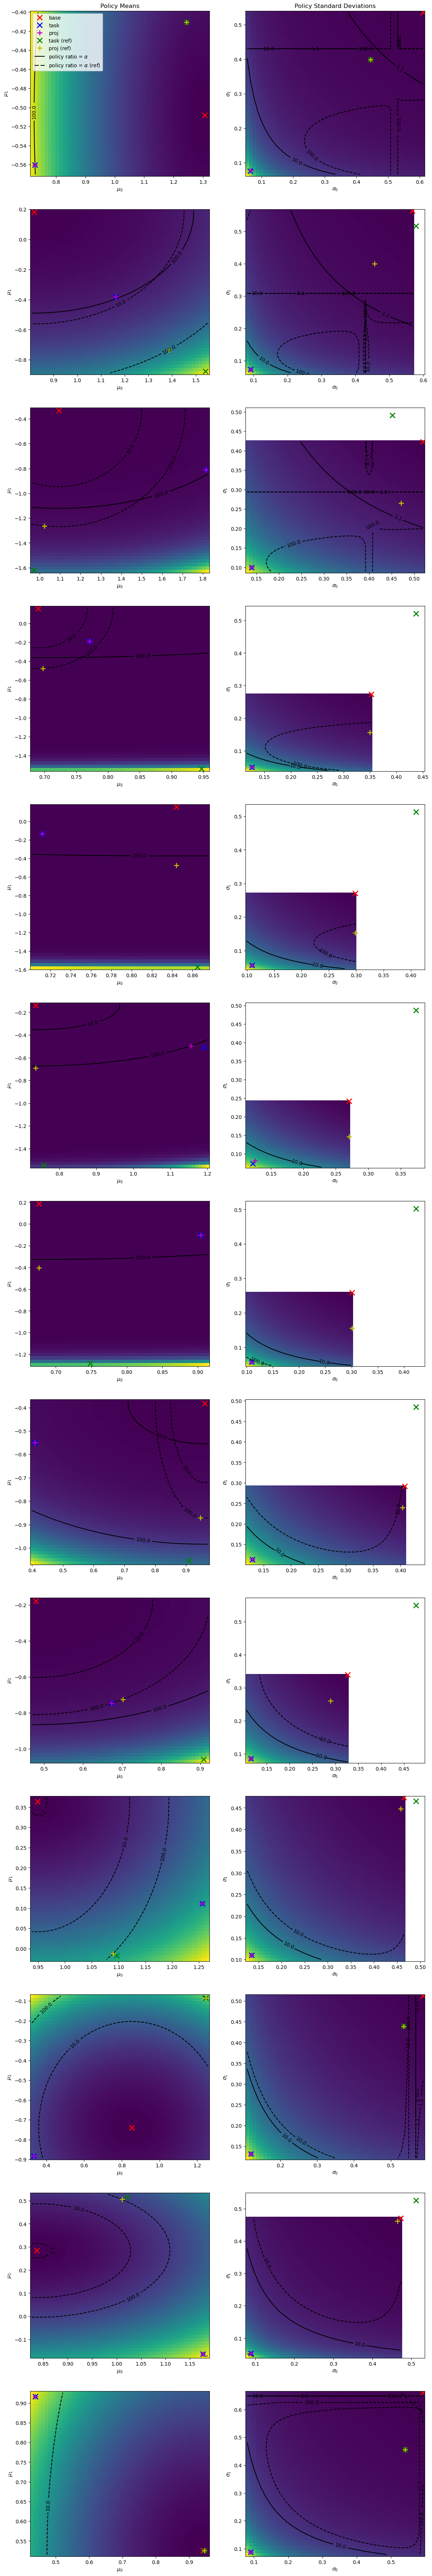

In [3]:
idxs = np.arange(
    policy_projection_database.num_collected_data - 14,
    policy_projection_database.num_collected_data - 1,
)
fig, axs = policy_projection_database.plot_policy_projection(
    idxs=idxs, plot_ref_task=True, extra_alphas=[1.1, 10]
)